Written by Oguzhan Gur.

Results of PFE on validation datasets.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import torch
from pathlib import Path
from data.data_pipe import get_val_pair
from models.mobilenet import MobileFaceNet
from models.uncertainty_head import UncertaintyHead
from utils.utils import get_pfe_evaluate
from torchvision import transforms as trans

In [2]:
device = torch.device("cpu")
data_path = Path('data')

model = MobileFaceNet(512).to(device)
save_path = '/home/oguz/workspace/projects/arcface-pfe-torch/pretrained/model_mobilefacenet.pth'
model.load_state_dict(torch.load(save_path))
pfe_model = UncertaintyHead()
checkpoint = torch.load('/home/oguz/workspace/projects/arcface-pfe-torch/checkpoints/pfe/sota.pth.tar')
pfe_model.load_state_dict(checkpoint['uncertain'])

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

lfw - accuray:0.9925, threshold:-2448.881629900744


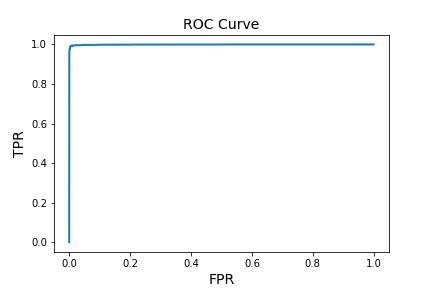

In [3]:
# LFW
eval_data_path = data_path / 'faces_webface'
lfw, lfw_issame = get_val_pair(eval_data_path, 'lfw')
accuracy, best_threshold, roc_curve_tensor = get_pfe_evaluate( lfw, lfw_issame, model=model,
                                                               pfe_model =pfe_model, nrof_folds=10, tta=True)
print('lfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

cplfw - accuray:0.8696666666666667, threshold:-2410.692436087754


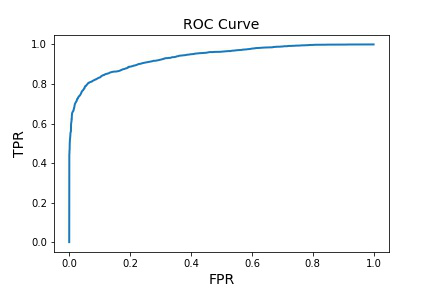

In [4]:
# CPLFW
eval_data_path = data_path / 'faces_webface'
cplfw, cplfw_issame = get_val_pair(eval_data_path, 'cplfw')
accuracy, best_threshold, roc_curve_tensor = get_pfe_evaluate( cplfw, cplfw_issame,model=model,
                                                               pfe_model =pfe_model, nrof_folds=10, tta=True)
print('cplfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

calfw - accuray:0.9413333333333332, threshold:-2409.177712925785


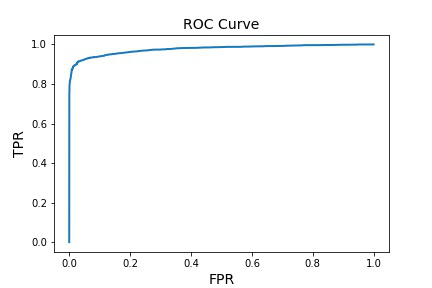

In [5]:
# CALFW
eval_data_path = data_path / 'faces_webface'
calfw, calfw_issame = get_val_pair(eval_data_path, 'calfw')
accuracy, best_threshold, roc_curve_tensor = get_pfe_evaluate( calfw, calfw_issame,model=model,
                                                               pfe_model =pfe_model, nrof_folds=10, tta=True)
print('calfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

agedb_30 - accuray:0.9333333333333333, threshold:-2399.024726716149


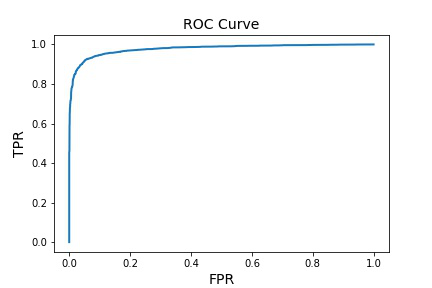

In [6]:
# AGEDB-30
eval_data_path = data_path / 'faces_webface'
agedb_30, agedb_30_issame = get_val_pair(eval_data_path, 'agedb_30')
accuracy, best_threshold, roc_curve_tensor = get_pfe_evaluate( agedb_30, agedb_30_issame, model=model,
                                                               pfe_model =pfe_model, nrof_folds=10, tta=True)
print('agedb_30 - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

